In [37]:
# Import relevant dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [3]:
# Set the executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 42.1MB/s]


In [4]:
# Assign url to the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [5]:
# Set up the HTML parser
html = browser.html
news_soup = soup(html, 'html.parser')

In [6]:
# Use read_html to create a df that holds the table data from the website 
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [15]:
# Convert the above list to a dataframe
mars_df = pd.DataFrame(df[0], columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure'])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
# Check the mars_df data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [17]:
# Convert the terrestrial_date column to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [21]:
# 1. How many months exist on Mars?
mars_df['month'].nunique()

12

In [22]:
# 2. How many Martian days worth of data exist in the dataset?
mars_df['sol'].nunique()

1867

In [30]:
# 3. Coldest and Warmest months on Mars?

# Group mars_df by month
grouped_mars_df = mars_df.groupby(['month'])
print(grouped_mars_df)

# Calculate the mean min temp for each month
avg_temp = grouped_mars_df['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

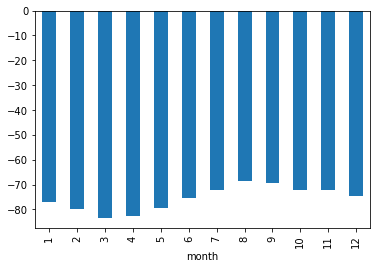

In [33]:
# Plot the above results as a bar chart
avg_temp_chart = avg_temp.plot(kind='bar')

plt.show()

In [34]:
# 2. Which months have the lowest and the highest atmospheric pressure on Mars?

# Calculate the mean atmospheric pressure for each month
avg_pressure = grouped_mars_df['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

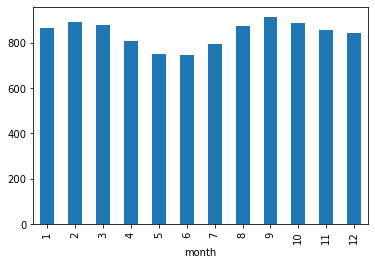

In [35]:
# Plot the above results as a bar chart
avg_pressure_chart = avg_pressure.plot(kind='bar')

plt.show()

In [36]:
# About how many terrestrial (Earth) days exist in a Martian year?

# 
year_end = mars_df.loc[mars_df['ls']==0]
year_end

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [40]:
b = year_end['terrestrial_date'].iloc[0]
martian_year_end = year_end['terrestrial_date'].iloc[2]
martian_year = martian_year_end - b
martian_year

Timedelta('687 days 00:00:00')

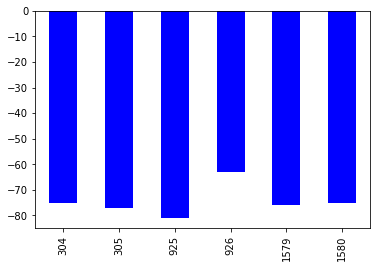

In [41]:
# Plot the daily minimum temp
min_temp_graph = year_end['min_temp'].plot(kind="bar", facecolor="blue")
plt.show()